<a href="https://colab.research.google.com/github/lakshmirnair/problem-solving-in-python/blob/master/ML_algorithm/Scikit_Learn_package.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Scikit-Learn is a package that provides efficient versions of a large number of common algorithms

In [ ]:
#Data as table in the form of pandas dataframe.
#The features matrix is assumed to be two-dimensional, with shape [n_samples, n_features]
import seaborn as sns
iris = sns.load_dataset('iris') 
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


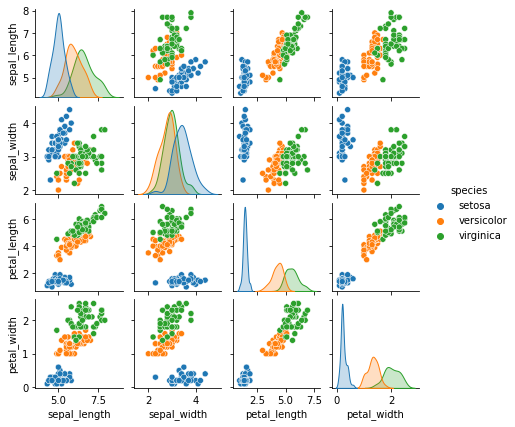

In [ ]:
import seaborn as sns; 
sns.pairplot(iris, hue='species', size=1.5);

In [ ]:
X_iris = iris.drop('species', axis=1)
X_iris.shape

(150, 4)

In [ ]:
y_iris = iris['species']
y_iris.shape

(150,)

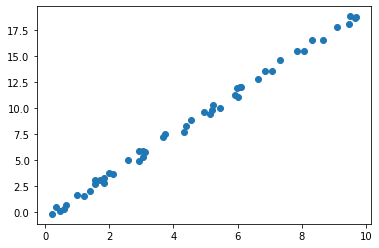

In [ ]:
#simple linear regression(example)
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.rand(50)
plt.scatter(x,y)

Choose Model hyperparameters:
1.Offest(y_intercept) is required or not.

2.whether the model to be normalized or not

3.Preprocess the specified features to add more flexibility

4.Degree of regularization to be used in the model

5.How many model components has to be used 

In [ ]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression(fit_intercept=True)
#arrange data into feature matrix
#np.newaxis increase the dimension 1D->2D,2D->3D etc.
X = x[:, np.newaxis]
X.shape

(50, 1)

In [ ]:
LR.fit(X, y)
print(LR.coef_)
LR.intercept_

[2.00660766]


-0.5350275750800026

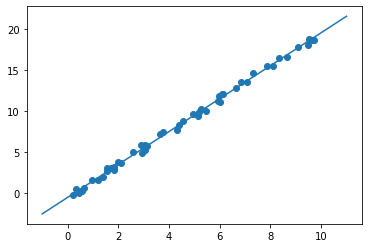

In [ ]:
# calculated over the interval [start, stop].
xfit = np.linspace(-1, 11)

Xfit = xfit[:, np.newaxis]
yfit = LR.predict(Xfit)
plt.scatter(x, y)
plt.plot(xfit, yfit);

EXample 2: Supervised Learning;Iris classification

In [ ]:
from sklearn.model_selection import train_test_split
# if a fixed value is assigned like random_state = 0 or 1 or 42 or any
#other integer then no matter how many times you execute your code the
#result would be the same .i.e, same values in train and test datasets.
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris,
                                                random_state=1)
from sklearn.naive_bayes import GaussianNB 
model = GaussianNB()                       
model.fit(Xtrain, ytrain)                  
y_model = model.predict(Xtest)
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9736842105263158

Example 3: Unsupervised Learning; Iris Dimensionality

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


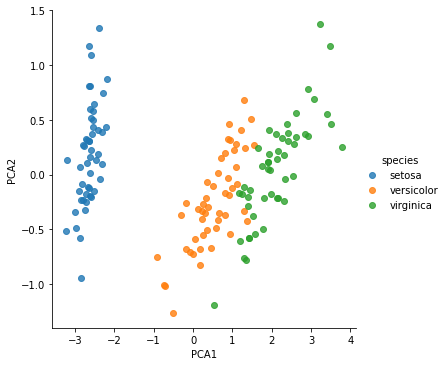

In [ ]:
from sklearn.decomposition import PCA 
model = PCA(n_components=2)          
model.fit(X_iris)                      
X_2D = model.transform(X_iris)  
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot("PCA1", "PCA2", hue='species', data=iris, fit_reg=False);

Example 4: Unsupervised Learning; Iris clustering

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


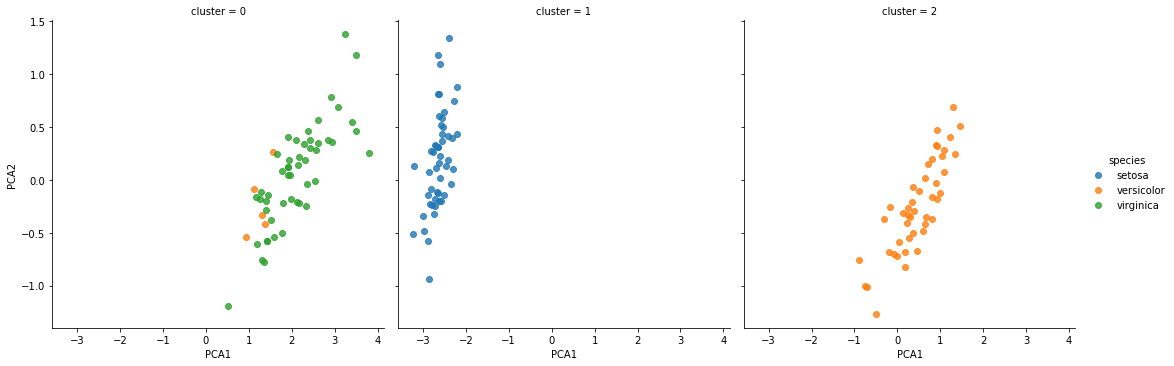

In [ ]:
#Gaussian Mixture models
from sklearn import mixture

model = mixture.GaussianMixture(n_components=3,
            covariance_type='full')  
model.fit(X_iris)                    
y_gmm = model.predict(X_iris)   
iris['cluster'] = y_gmm
sns.lmplot("PCA1", "PCA2", data=iris, hue='species',
           col='cluster', fit_reg=False);

Hand Written digits

Loading and Visualising the data

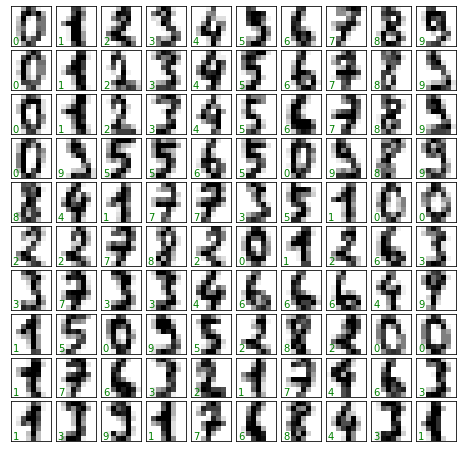

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape
import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')

In [ ]:
X = digits.data
print(X.shape)
y= digits.target
print(y.shape)



(1797, 64)
(1797,)


Dimensionality Reduction

(1797, 2)


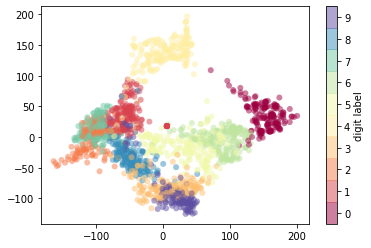

In [ ]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
print(data_projected.shape)
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,
            edgecolor='none', alpha=0.5, cmap=plt.cm.get_cmap('Spectral', 10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5);

Classification on Digits

0.8333333333333334


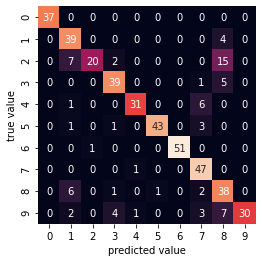

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)
from sklearn.metrics import accuracy_score
print(accuracy_score(ytest, y_model))
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');
                                                

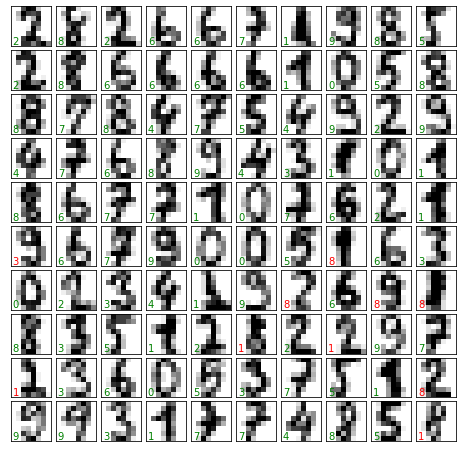

In [ ]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

test_images = Xtest.reshape(-1, 8, 8)

for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]),
            transform=ax.transAxes,
            color='green' if (ytest[i] == y_model[i]) else 'red')